In [40]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor , AutoTokenizer

In [41]:
import torch

In [42]:
from PIL import Image as PILImage

In [43]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [44]:
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [45]:
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [46]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}


In [47]:
def caption(image_paths):
  images = []
  for image_path in image_paths:
    img = PILImage.open(image_path)
    if img.mode != "RGB":
      img = img.convert(mode="RGB")
    images.append(img)
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    output_ids = model.generate(pixel_values, **gen_kwargs)
    prediction = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    prediction = [pred.strip() for pred in prediction]
    print(prediction)
    return prediction

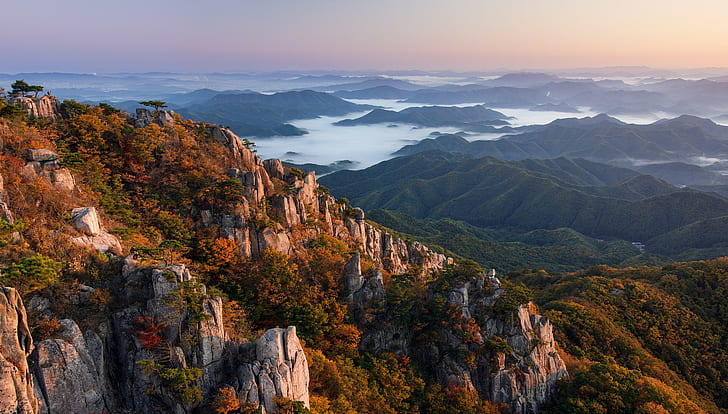

['a mountain range with a mountain range behind it']


In [53]:
from IPython.display import Image, display
display(Image(filename='test4.jpeg'))
caption(['test4.jpeg'])